# 📊 Global Suicide Statistics – Full EDA Notebook

### 1️⃣ Import Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")

### 2️⃣ Load Dataset

In [13]:
df = pd.read_csv("/kaggle/input/global-suicide-statistics/suicide-rate-by-country-2024.csv")

### 3️⃣ Basic Inspection

In [14]:
df.head()

,country,SuicideRate_BothSexes_RatePer100k_2021,SuicideRate_Male_RatePer100k_2021,SuicideRate_Female_RatePer100k_2021,SuicideRate_BothSexes_RatePer100k_2020,SuicideRate_Male_RatePer100k_2020,SuicideRate_Female_RatePer100k_2020,SuicideRate_BothSexes_RatePer100k_2019,SuicideRate_Male_RatePer100k_2019,SuicideRate_Female_RatePer100k_2019
0,India,13.33,15.70,10.85,13.28,15.70,10.73,12.7,14.1,11.1
1,China,9.17,10.64,7.63,9.04,10.52,7.50,8.1,9.8,6.2
2,United States,15.25,24.13,6.66,15.38,24.33,6.73,16.1,25.0,7.5
3,Indonesia,1.64,2.21,1.05,1.66,2.23,1.07,2.4,3.7,1.1
4,Pakistan,5.82,8.46,3.05,5.89,8.54,3.10,8.9,13.3,4.3


In [15]:
df.tail()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,country,SuicideRate_BothSexes_RatePer100k_2021,SuicideRate_Male_RatePer100k_2021,SuicideRate_Female_RatePer100k_2021,SuicideRate_BothSexes_RatePer100k_2020,SuicideRate_Male_RatePer100k_2020,SuicideRate_Female_RatePer100k_2020,SuicideRate_BothSexes_RatePer100k_2019,SuicideRate_Male_RatePer100k_2019,SuicideRate_Female_RatePer100k_2019
199,Cook Islands,9.17,14.39,3.95,11.63,18.30,5.32,NaN,NaN,NaN
200,Nauru,23.55,35.11,11.79,23.66,35.25,11.86,NaN,NaN,NaN
201,Tuvalu,16.49,23.79,8.56,16.61,23.92,8.68,NaN,NaN,NaN
202,Tokelau,15.83,19.54,11.97,15.95,19.71,12.05,NaN,NaN,NaN
203,Niue,15.59,20.62,10.51,15.63,20.66,10.54,NaN,NaN,NaN


In [16]:
df.shape

(204, 10)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   country                                 204 non-null    object 
 1   SuicideRate_BothSexes_RatePer100k_2021  204 non-null    float64
 2   SuicideRate_Male_RatePer100k_2021       204 non-null    float64
 3   SuicideRate_Female_RatePer100k_2021     204 non-null    float64
 4   SuicideRate_BothSexes_RatePer100k_2020  204 non-null    float64
 5   SuicideRate_Male_RatePer100k_2020       204 non-null    float64
 6   SuicideRate_Female_RatePer100k_2020     204 non-null    float64
 7   SuicideRate_BothSexes_RatePer100k_2019  183 non-null    float64
 8   SuicideRate_Male_RatePer100k_2019       182 non-null    float64
 9   SuicideRate_Female_RatePer100k_2019     183 non-null    float64
dtypes: float64(9), object(1)
memory usage: 16.1+ KB


### 4️⃣ Column Renaming (Clean & Consistent)

In [18]:
df.columns = [
    "country",
    "rate_2021_both",
    "rate_2021_male",
    "rate_2021_female",
    "rate_2020_both",
    "rate_2020_male",
    "rate_2020_female",
    "rate_2019_both",
    "rate_2019_male",
    "rate_2019_female"
]

df.head()

,country,rate_2021_both,rate_2021_male,rate_2021_female,rate_2020_both,rate_2020_male,rate_2020_female,rate_2019_both,rate_2019_male,rate_2019_female
0,India,13.33,15.70,10.85,13.28,15.70,10.73,12.7,14.1,11.1
1,China,9.17,10.64,7.63,9.04,10.52,7.50,8.1,9.8,6.2
2,United States,15.25,24.13,6.66,15.38,24.33,6.73,16.1,25.0,7.5
3,Indonesia,1.64,2.21,1.05,1.66,2.23,1.07,2.4,3.7,1.1
4,Pakistan,5.82,8.46,3.05,5.89,8.54,3.10,8.9,13.3,4.3


### 5️⃣ Missing Values Analysis

In [19]:
df.isnull().sum()

country              0
rate_2021_both       0
rate_2021_male       0
rate_2021_female     0
rate_2020_both       0
rate_2020_male       0
rate_2020_female     0
rate_2019_both      21
rate_2019_male      22
rate_2019_female    21
dtype: int64

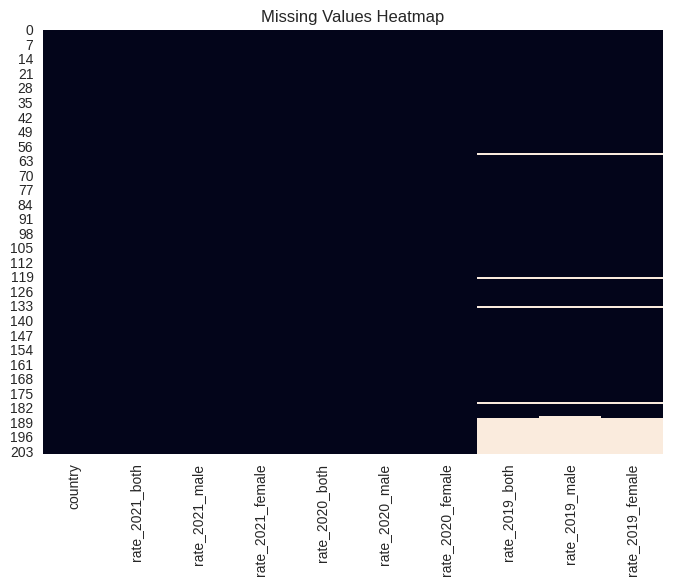

In [20]:
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

### 6️⃣ Summary Statistics

In [21]:
df.describe()

,rate_2021_both,rate_2021_male,rate_2021_female,rate_2020_both,rate_2020_male,rate_2020_female,rate_2019_both,rate_2019_male,rate_2019_female
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,183.000000,182.000000,183.000000
mean,9.525931,14.802304,4.358284,13.669951,14.922108,4.400539,9.455191,14.732418,4.350820
std,6.802563,10.840661,3.311081,58.351062,11.127588,3.402186,7.989620,13.108952,3.531769
min,0.780000,1.180000,0.300000,0.770000,1.180000,0.290000,0.400000,0.600000,0.300000
25%,5.090000,7.577500,2.262500,5.075000,7.500000,2.282500,4.600000,6.825000,2.000000
50%,7.885000,12.205000,3.540000,8.015000,12.410000,3.520000,7.500000,11.350000,3.300000
75%,12.912500,19.857500,5.785000,13.037500,19.897500,5.900000,11.850000,17.975000,6.050000
max,59.620000,86.960000,29.400000,837.000000,94.390000,31.590000,72.400000,116.000000,30.100000


### 7️⃣ Top Countries by Suicide Rate (2021)

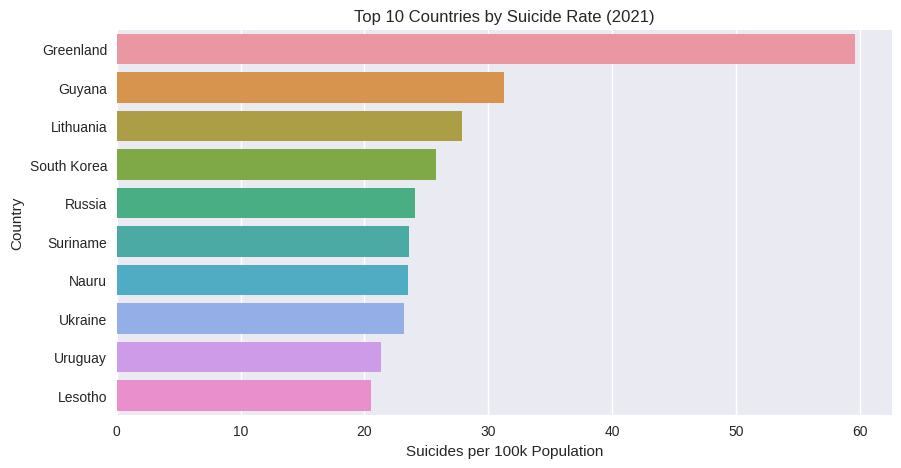

In [22]:
top_2021 = df.sort_values("rate_2021_both", ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(
    x="rate_2021_both",
    y="country",
    data=top_2021
)
plt.title("Top 10 Countries by Suicide Rate (2021)")
plt.xlabel("Suicides per 100k Population")
plt.ylabel("Country")
plt.show()

### 8️⃣ Male vs Female Suicide Rates (2021)

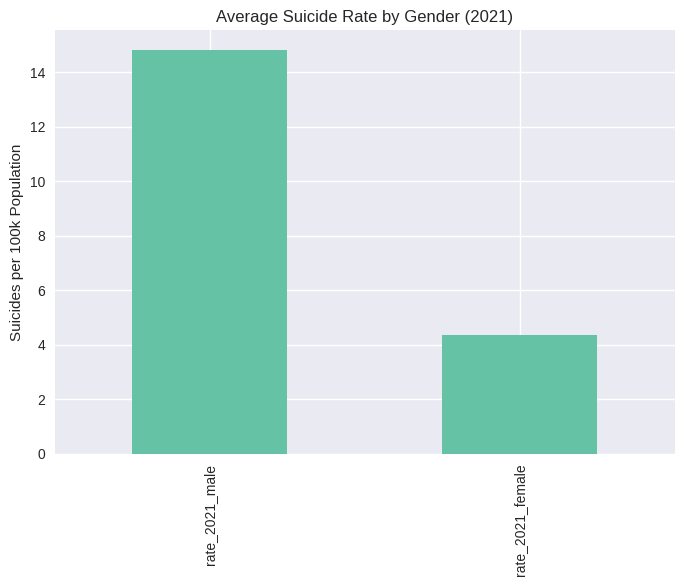

In [23]:
gender_2021 = df[[
    "rate_2021_male",
    "rate_2021_female"
]].mean()

gender_2021.plot(kind="bar")
plt.title("Average Suicide Rate by Gender (2021)")
plt.ylabel("Suicides per 100k Population")
plt.show()

### 9️⃣ Suicide Rate Trend by Year (Both Sexes)

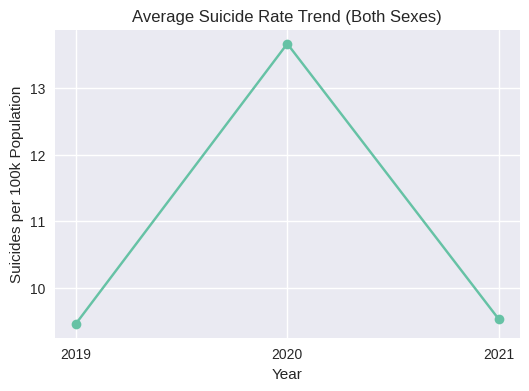

In [24]:
yearly_avg = {
    "2019": df["rate_2019_both"].mean(),
    "2020": df["rate_2020_both"].mean(),
    "2021": df["rate_2021_both"].mean()
}

plt.figure(figsize=(6,4))
plt.plot(yearly_avg.keys(), yearly_avg.values(), marker="o")
plt.title("Average Suicide Rate Trend (Both Sexes)")
plt.xlabel("Year")
plt.ylabel("Suicides per 100k Population")
plt.show()

### 🔟 Country-Level Trend Example

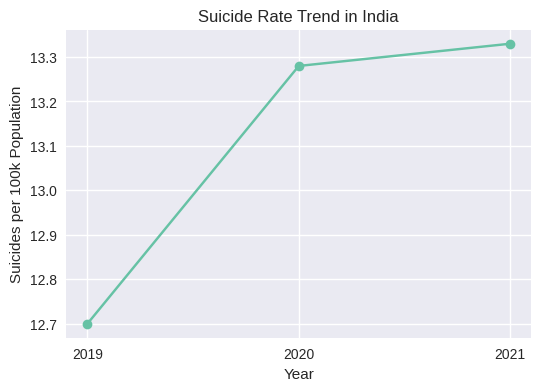

In [25]:
country_name = df.iloc[0]["country"]  # change country if needed

country_row = df[df["country"] == country_name]

years = ["2019", "2020", "2021"]
rates = [
    country_row["rate_2019_both"].values[0],
    country_row["rate_2020_both"].values[0],
    country_row["rate_2021_both"].values[0]
]

plt.figure(figsize=(6,4))
plt.plot(years, rates, marker="o")
plt.title(f"Suicide Rate Trend in {country_name}")
plt.xlabel("Year")
plt.ylabel("Suicides per 100k Population")
plt.show()

### 1️⃣1️⃣ Male vs Female Comparison (All Years)

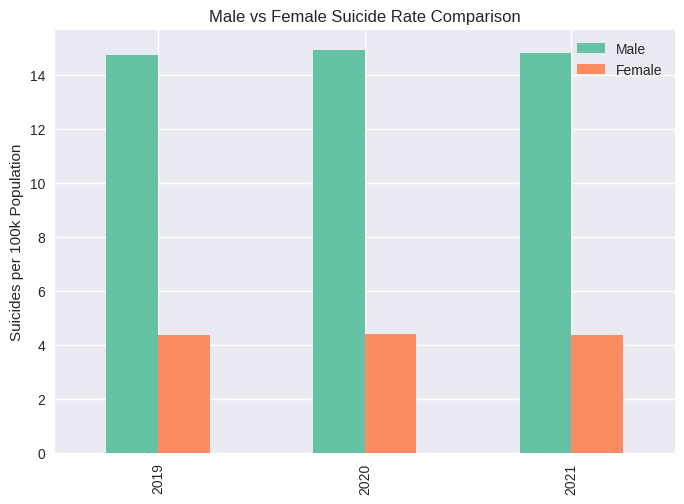

In [26]:
male_rates = df[[
    "rate_2019_male",
    "rate_2020_male",
    "rate_2021_male"
]].mean()

female_rates = df[[
    "rate_2019_female",
    "rate_2020_female",
    "rate_2021_female"
]].mean()

comparison = pd.DataFrame({
    "Male": male_rates.values,
    "Female": female_rates.values
}, index=["2019", "2020", "2021"])

comparison.plot(kind="bar")
plt.title("Male vs Female Suicide Rate Comparison")
plt.ylabel("Suicides per 100k Population")
plt.show()

### 1️⃣2️⃣ Correlation Analysis

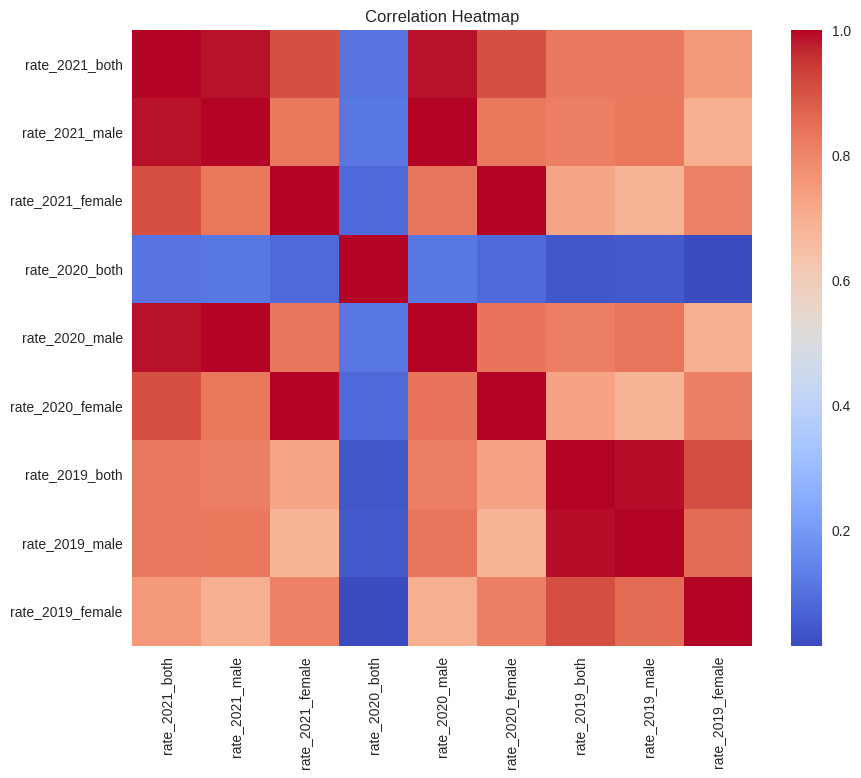

In [27]:
corr = df.drop(columns=["country"]).corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

## 📌 Key Insights
### Key Observations
- Male suicide rates are consistently higher than female rates across all years.
- Suicide rates show slight year-to-year variation between 2019 and 2021.
- Some countries consistently exhibit higher suicide rates across years.
- Strong correlations exist between suicide rates of consecutive years.
